'''С помощью KMeans разбейте данные из тренировочного набора на 3 кластера,
используйте все признаки из датафрейма X_train.
Параметр max_iter должен быть равен 100, random staterandom_state сделайте равным 42.
Постройте еще раз диаграмму рассеяния на данных, полученных с помощью TSNE,
и раскрасьте точки из разных кластеров разными цветами.
Вычислите средние значения price и CRIM в разных кластерах.
'''

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [2]:
boston = load_boston()
data = boston["data"]
feature_names = boston["feature_names"]
X = pd.DataFrame(data, columns = feature_names)
target = boston["target"]
y = pd.DataFrame(target, columns = ["price"])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)
scaler = StandardScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns = X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns = X_test.columns)
tsne = TSNE(n_components = 2, learning_rate = 250, random_state = 42)
X_train_tsne = tsne.fit_transform(X_train_scaled)

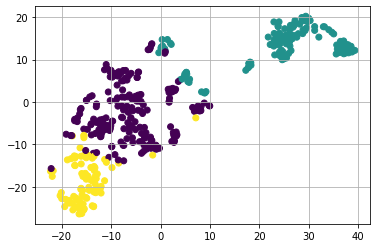

In [3]:
model = KMeans(n_clusters = 3, random_state = 42, max_iter = 100)
labels_train = model.fit_predict(X_train_scaled)
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], c = labels_train)
plt.grid(True)
plt.show()

In [16]:
print('Первый кластер: ', 'Mean price - ', np.array(y_train[labels_train == 0]).mean(), '\n', 'Mean CRIM - ', X_train['CRIM'][labels_train == 0].mean())
print('Второй кластер:', 'Mean price - ', np.array(y_train[labels_train == 1]).mean(), '\n', 'Mean CRIM - ', X_train['CRIM'][labels_train == 1].mean())
print('Третий кластер:', 'Mean price - ', np.array(y_train[labels_train == 2]).mean(), '\n', 'Mean CRIM - ', X_train['CRIM'][labels_train == 2].mean())

Первый кластер:  Mean price -  24.958115183246072 
 Mean CRIM -  0.42166020942408367
Второй кластер: Mean price -  16.165354330708663 
 Mean CRIM -  10.797028425196853
Третий кластер: Mean price -  27.78837209302326 
 Mean CRIM -  0.07356558139534886
